# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Import the Data

We use the transformed data from 'Feature Engineering' notebook.

In [2]:
df = pd.read_csv("data/diabetes_clean.csv")
df.shape

(631, 19)

The data set contains 631 rows and 19 columns.

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_log,SkinThickness_log,BMI_log,DiabetesPedigreeFunction_log,low_glu_insulin,low_skin_bmi
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,False,False,True,False,5.138735,3.583519,3.543854,-0.466809,False,False
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,True,False,False,4.639572,3.401197,3.317816,-1.046969,True,True
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,True,True,False,False,5.138735,3.496508,3.190476,-0.397497,False,False
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,True,False,False,4.553877,3.178054,3.370738,-1.789761,True,True
4,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,False,True,False,False,4.639572,3.332205,3.280911,-1.604450,True,True


# Split the Data into Training and Test Set

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_log', 'SkinThickness_log',
       'BMI_log', 'DiabetesPedigreeFunction_log', 'low_glu_insulin',
       'low_skin_bmi'],
      dtype='object')

We're not going to use all the variables, but to select a few.

In [5]:
from sklearn.model_selection import train_test_split

X = df.loc[:, ['Glucose', 'BloodPressure', 'Pregnancies', 'Age',
              'Insulin_log', 'SkinThickness_log', 'BMI_log', 'DiabetesPedigreeFunction_log',
              'low_glu_insulin']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
X_train.shape, X_test.shape

((504, 9), (127, 9))

# Train Machine Learning Algorithm
## Decision Tree Classifier

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

max_depth = np.random.randint(3, 20, 10)
max_features = np.random.uniform(0.7, 1, 100)
min_samples_split = list(range(2, 7))

param_distributions = {"max_depth": max_depth, 
                       "max_features": max_features,
                       "min_samples_split": min_samples_split}

clf = RandomizedSearchCV(DecisionTreeClassifier(),
                         param_distributions,
                         n_iter=100,
                         scoring="accuracy",
                         n_jobs=-1,
                         cv=5,
                         random_state=1)

clf.fit(X_train, y_train)

C:\Users\Seyong Ryoo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [8]:
clf.best_score_

0.8928571428571429

In [9]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9212598425196851

When we used this algorithm for test data, the accuracy was approximately 92%.

In [10]:
clf.best_params_

{'min_samples_split': 5, 'max_features': 0.8359408258424754, 'max_depth': 5}

In [11]:
clf = clf.best_estimator_ 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=0.8359408258424754, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

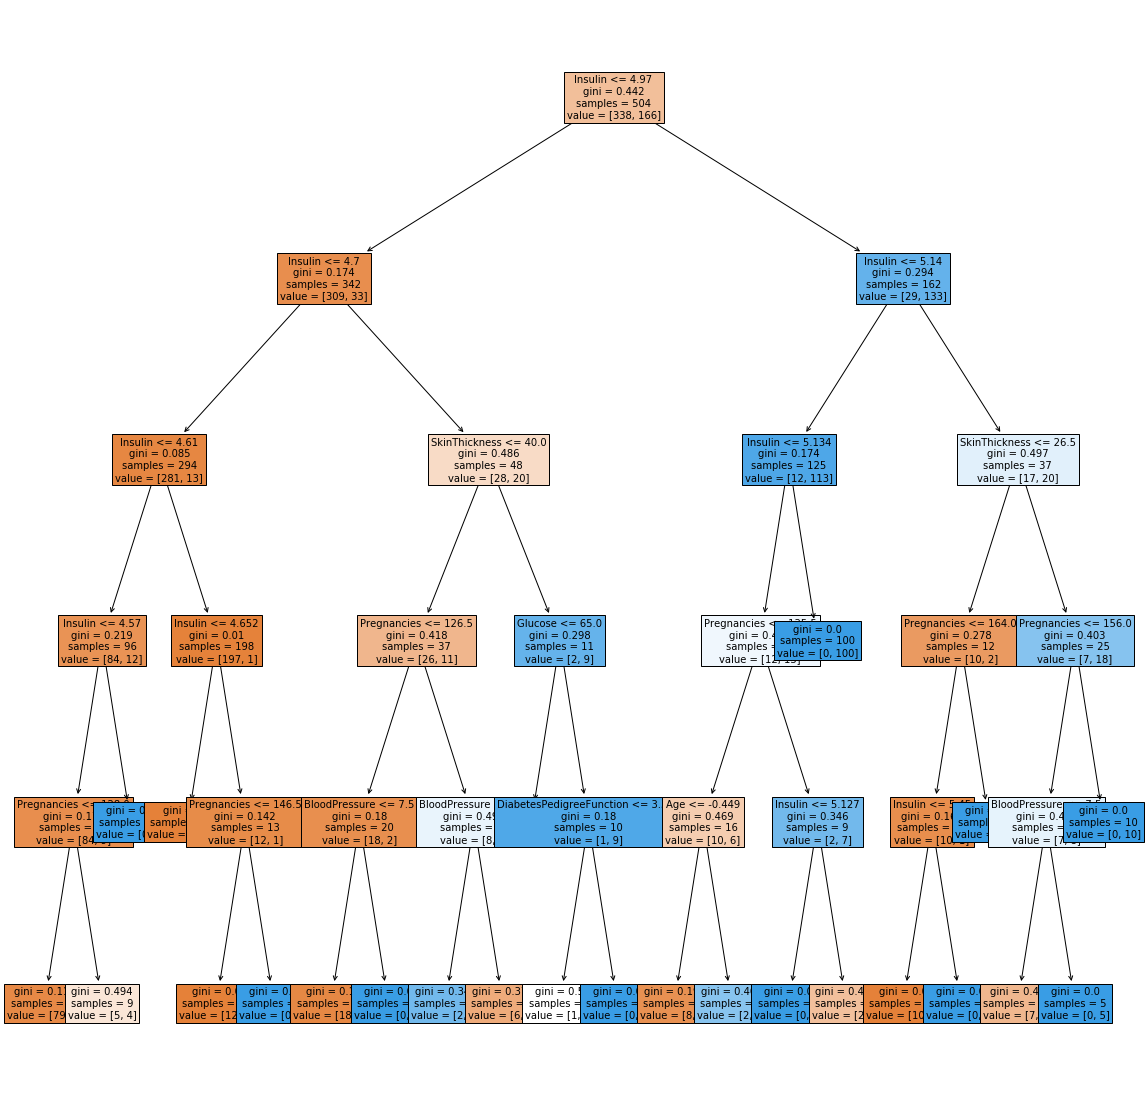

In [12]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20, 20))
tree = plot_tree(clf, 
                 feature_names = df.columns,
                 filled = True, 
                 fontsize = 10)

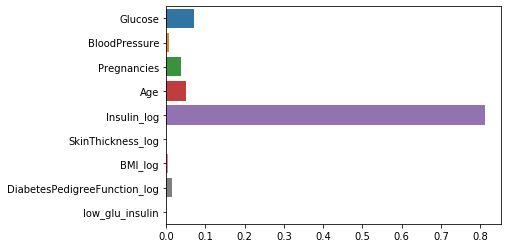

In [13]:
sns.barplot(x=clf.feature_importances_, y=X_train.columns)

## Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

max_depth = np.random.randint(3, 20, 10)
max_features = np.random.uniform(0.7, 1, 100)
min_samples_split = list(range(2, 7))

param_distributions = {"max_depth": max_depth, 
                       "max_features": max_features,
                       "min_samples_split": min_samples_split}

clf = RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions,
                         n_iter=100,
                         scoring="accuracy",
                         n_jobs=-1,
                         cv=5,
                         random_state=1)

clf.fit(X_train, y_train)

C:\Users\Seyong Ryoo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Seyong Ryoo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [15]:
clf.best_score_

0.8948412698412699

In [16]:
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.937007874015748

In [17]:
clf.best_params_

{'min_samples_split': 5, 'max_features': 0.805122533158485, 'max_depth': 10}

In [18]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=0.805122533158485,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

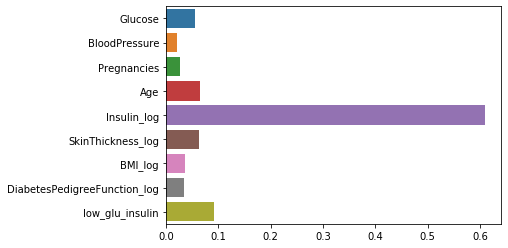

In [19]:
sns.barplot(x=clf.feature_importances_, y=X_train.columns)

## Gradient Boosting Classifier

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

max_depth = np.random.randint(3, 20, 10)
max_features = np.random.uniform(0.7, 1, 100)
min_samples_split = list(range(2, 7))

param_distributions = {"max_depth": max_depth, 
                       "max_features": max_features,
                       "min_samples_split": min_samples_split}

clf = RandomizedSearchCV(GradientBoostingClassifier(),
                         param_distributions,
                         n_iter=100,
                         scoring="accuracy",
                         n_jobs=-1,
                         cv=5,
                         random_state=1)

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                     

In [21]:
clf.best_score_

0.8948412698412699

In [22]:
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9212598425196851

In [23]:
clf.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=12,
                           max_features=0.8978131570733465, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [24]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=12,
                           max_features=0.8978131570733465, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

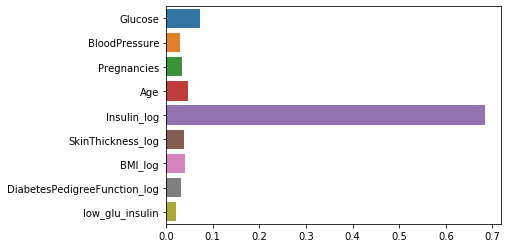

In [25]:
sns.barplot(x=clf.feature_importances_, y=X_train.columns)